# Logistic Regression

In [1]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report,confusion_matrix
import statsmodels.api as sts
from sklearn import metrics

In [2]:
#declaring path and importing data
path='F:/Munesh Backup/Munesh/Imarticus/Projects/Logistic Regression/6 - Project 2 Logistic Regression/German_Credit_data.csv'
credit_data=pd.read_csv(path)
credit_data.head()

,Creditability,Status_of_existing_account,Duration_of_Credit_month,Payment_Status_of_Previous_Credit(Credit_history),Purpose_of_loan,Credit_Amount,Value_of_Savings_account&bonds,Years_of_Present_Employment,Percentage_of_disposable_income,Sex_&_Marital_Status,...,Duration_in_Present_Residence,Property,Age_in_years,Concurrent_Credits,Housing,No_of_Credits_at_this__Bank,Occupation,No_of_dependents,Telephone,Foreign_Worker
0,1,1,18,4,2,1049,1,2,4,2,...,4,2,21,3,1,1,3,1,1,1
1,1,1,9,4,0,2799,1,3,2,3,...,2,1,36,3,1,2,3,2,1,1
2,1,2,12,2,9,841,2,4,2,2,...,4,1,23,3,1,1,2,1,1,1
3,1,1,12,4,0,2122,1,3,3,3,...,2,1,39,3,1,2,2,2,1,2
4,1,1,12,4,0,2171,1,3,4,3,...,4,2,38,1,2,2,2,1,1,2


In [3]:
#checking data shape
credit_data.shape

(1000, 21)

In [4]:
#checking data types
credit_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                                             Non-Null Count  Dtype
---  ------                                             --------------  -----
 0   Creditability                                      1000 non-null   int64
 1   Status_of_existing_account                         1000 non-null   int64
 2   Duration_of_Credit_month                           1000 non-null   int64
 3   Payment_Status_of_Previous_Credit(Credit_history)  1000 non-null   int64
 4   Purpose_of_loan                                    1000 non-null   int64
 5   Credit_Amount                                      1000 non-null   int64
 6   Value_of_Savings_account&bonds                     1000 non-null   int64
 7   Years_of_Present_Employment                        1000 non-null   int64
 8   Percentage_of_disposable_income                    1000 non-null   int64
 9   Sex_&_Marital_Status           

In [5]:
#statistical summary
credit_data.describe()

,Creditability,Status_of_existing_account,Duration_of_Credit_month,Payment_Status_of_Previous_Credit(Credit_history),Purpose_of_loan,Credit_Amount,Value_of_Savings_account&bonds,Years_of_Present_Employment,Percentage_of_disposable_income,Sex_&_Marital_Status,...,Duration_in_Present_Residence,Property,Age_in_years,Concurrent_Credits,Housing,No_of_Credits_at_this__Bank,Occupation,No_of_dependents,Telephone,Foreign_Worker
count,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.00000,...,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.700000,2.577000,20.903000,2.54500,2.828000,3271.24800,2.105000,3.384000,2.973000,2.68200,...,2.845000,2.358000,35.54200,2.675000,1.928000,1.407000,2.904000,1.155000,1.404000,1.037000
std,0.458487,1.257638,12.058814,1.08312,2.744439,2822.75176,1.580023,1.208306,1.118715,0.70808,...,1.103718,1.050209,11.35267,0.705601,0.530186,0.577654,0.653614,0.362086,0.490943,0.188856
min,0.000000,1.000000,4.000000,0.00000,0.000000,250.00000,1.000000,1.000000,1.000000,1.00000,...,1.000000,1.000000,19.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,1.000000,12.000000,2.00000,1.000000,1365.50000,1.000000,3.000000,2.000000,2.00000,...,2.000000,1.000000,27.00000,3.000000,2.000000,1.000000,3.000000,1.000000,1.000000,1.000000
50%,1.000000,2.000000,18.000000,2.00000,2.000000,2319.50000,1.000000,3.000000,3.000000,3.00000,...,3.000000,2.000000,33.00000,3.000000,2.000000,1.000000,3.000000,1.000000,1.000000,1.000000
75%,1.000000,4.000000,24.000000,4.00000,3.000000,3972.25000,3.000000,5.000000,4.000000,3.00000,...,4.000000,3.000000,42.00000,3.000000,2.000000,2.000000,3.000000,1.000000,2.000000,1.000000
max,1.000000,4.000000,72.000000,4.00000,10.000000,18424.00000,5.000000,5.000000,4.000000,4.00000,...,4.000000,4.000000,75.00000,3.000000,3.000000,4.000000,4.000000,2.000000,2.000000,2.000000


In [6]:
#Shuffling the dataset
credit_data=credit_data.sample(frac=1)
credit_data.head()

,Creditability,Status_of_existing_account,Duration_of_Credit_month,Payment_Status_of_Previous_Credit(Credit_history),Purpose_of_loan,Credit_Amount,Value_of_Savings_account&bonds,Years_of_Present_Employment,Percentage_of_disposable_income,Sex_&_Marital_Status,...,Duration_in_Present_Residence,Property,Age_in_years,Concurrent_Credits,Housing,No_of_Credits_at_this__Bank,Occupation,No_of_dependents,Telephone,Foreign_Worker
688,1,3,18,2,2,3049,1,2,1,2,...,1,2,45,2,2,1,2,1,1,1
96,1,2,12,4,3,3573,1,3,1,2,...,1,1,23,3,2,1,2,1,1,1
832,0,4,36,3,9,7980,5,2,4,3,...,4,3,27,3,1,2,3,1,2,1
566,1,2,36,3,9,9857,2,4,1,3,...,3,2,31,3,2,2,2,2,2,1
207,1,2,15,2,3,1444,5,2,4,3,...,1,2,23,3,2,1,3,1,1,1


In [7]:
#splitting target variable
creditability=credit_data.Creditability
creditability.head()

688    1
96     1
832    0
566    1
207    1
Name: Creditability, dtype: int64

1    700
0    300
Name: Creditability, dtype: int64

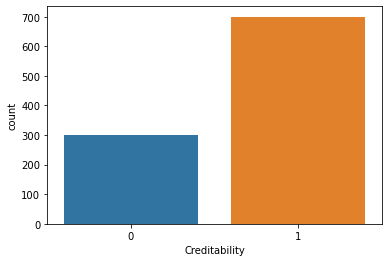

In [8]:
#plotting the count of target variable
sns.countplot(creditability)
creditability.value_counts()

In [9]:
#removing target variable from dataset
dependent_var=credit_data.drop('Creditability',axis=1)
dependent_var.head()
cols=dependent_var.columns

In [10]:
#EDA
#checking for null
print(dependent_var.isnull().sum())


Status_of_existing_account                           0
Duration_of_Credit_month                             0
Payment_Status_of_Previous_Credit(Credit_history)    0
Purpose_of_loan                                      0
Credit_Amount                                        0
Value_of_Savings_account&bonds                       0
Years_of_Present_Employment                          0
Percentage_of_disposable_income                      0
Sex_&_Marital_Status                                 0
Guarantors/Debtors                                   0
Duration_in_Present_Residence                        0
Property                                             0
Age_in_years                                         0
Concurrent_Credits                                   0
Housing                                              0
No_of_Credits_at_this__Bank                          0
Occupation                                           0
No_of_dependents                                     0
Telephone 

In [11]:
#checking for zeros
print(dependent_var[dependent_var==0].count())

Status_of_existing_account                             0
Duration_of_Credit_month                               0
Payment_Status_of_Previous_Credit(Credit_history)     40
Purpose_of_loan                                      234
Credit_Amount                                          0
Value_of_Savings_account&bonds                         0
Years_of_Present_Employment                            0
Percentage_of_disposable_income                        0
Sex_&_Marital_Status                                   0
Guarantors/Debtors                                     0
Duration_in_Present_Residence                          0
Property                                               0
Age_in_years                                           0
Concurrent_Credits                                     0
Housing                                                0
No_of_Credits_at_this__Bank                            0
Occupation                                             0
No_of_dependents               

In [12]:
#Check for correlation
cor=dependent_var.corr()
#cor=np.tril(cor,k=1)
cols=dependent_var.columns
print(cor)

                                                   Status_of_existing_account  \
Status_of_existing_account                                           1.000000   
Duration_of_Credit_month                                            -0.072013   
Payment_Status_of_Previous_Credit(Credit_history)                    0.192191   
Purpose_of_loan                                                      0.028783   
Credit_Amount                                                       -0.042695   
Value_of_Savings_account&bonds                                       0.222867   
Years_of_Present_Employment                                          0.106339   
Percentage_of_disposable_income                                     -0.005280   
Sex_&_Marital_Status                                                 0.043261   
Guarantors/Debtors                                                  -0.127737   
Duration_in_Present_Residence                                       -0.042234   
Property                    

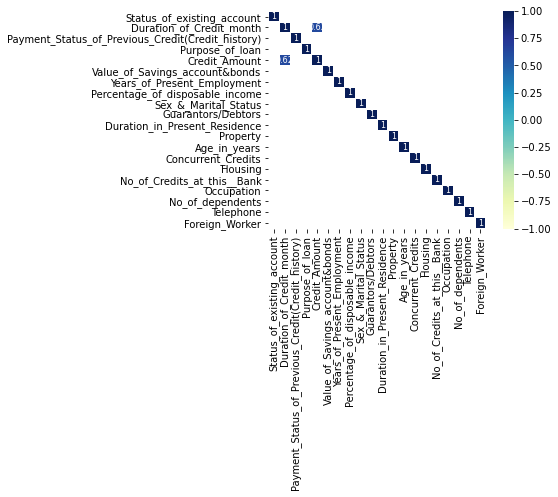

In [13]:
#correlation plot

sns.heatmap(cor[(cor >= 0.5) | (cor <= -0.5)],cmap='YlGnBu', 
            vmax=1.0, vmin=-1.0,linewidths=0.1,annot=True, annot_kws={"size": 8}, square=True)


In [14]:
#splitting the dataset
from sklearn.model_selection import train_test_split
train,test=train_test_split(credit_data,test_size=0.3,random_state=0)
trainx=train.drop('Creditability',axis=1)
trainy=train.Creditability
testx=test.drop('Creditability',axis=1)
testy=test.Creditability
print(trainx.shape)
print(testx.shape)
print(trainy.shape)
print(testy.shape)

(700, 20)
(300, 20)
(700,)
(300,)


In [15]:
#model fitting
m1=sts.Logit(trainy,trainx).fit()
print(m1.summary())

Optimization terminated successfully.
         Current function value: 0.474805
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:          Creditability   No. Observations:                  700
Model:                          Logit   Df Residuals:                      680
Method:                           MLE   Df Model:                           19
Date:                Mon, 22 Feb 2021   Pseudo R-squ.:                  0.2227
Time:                        23:43:44   Log-Likelihood:                -332.36
converged:                       True   LL-Null:                       -427.61
Covariance Type:            nonrobust   LLR p-value:                 2.634e-30
                                                        coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------------
Status_of_existing_account    

In [16]:
#making prediction
p1=m1.predict(testx)
p1[0:10]

81     0.951087
367    0.729763
349    0.884009
172    0.853147
743    0.980247
728    0.873158
985    0.838999
477    0.836361
604    0.387492
362    0.993772
dtype: float64

In [17]:
#considering cutoff as 0.5
cut_off=0.5
p1_pred=p1.copy()
p1_pred[p1_pred<cut_off]=0
p1_pred[p1_pred>=cut_off]=1
p1_pred

81     1.0
367    1.0
349    1.0
172    1.0
743    1.0
      ... 
809    0.0
317    1.0
718    1.0
183    1.0
269    1.0
Length: 300, dtype: float64

# model evaluation


In [19]:
#confusion matrix
con_mat_1=confusion_matrix(testy,p1_pred)
print(con_mat_1)

[[ 43  47]
 [ 29 181]]


In [20]:
#classification report
class_rep_1=classification_report(testy,p1_pred)
print(class_rep_1)

              precision    recall  f1-score   support

           0       0.60      0.48      0.53        90
           1       0.79      0.86      0.83       210

    accuracy                           0.75       300
   macro avg       0.70      0.67      0.68       300
weighted avg       0.73      0.75      0.74       300



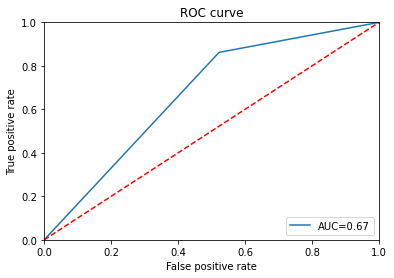

In [22]:
#plotting roc auc
fpr,tpr,threshold=metrics.roc_curve(testy,p1_pred)
roc_auc=metrics.auc(fpr,tpr)
plt.title('ROC curve')
plt.plot(fpr,tpr,label="AUC=%0.2f"%roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.show()

In [23]:
#model report
models_report=pd.DataFrame(columns=['Model','No. of features','cut off',
                                    'tpr','fpr','Roc Auc'])
tmp1=pd.Series({'Model':'M1','No. of features':len(trainx.columns),'cut off':cut_off,
                'tpr':np.round(tpr[1],2),'fpr':np.round(fpr[1],2),
                'Roc Auc':np.round(roc_auc,2)})

models_report=models_report.append(tmp1,ignore_index=True)
print(models_report)

  Model No. of features  cut off   tpr   fpr  Roc Auc
0    M1              20      0.5  0.86  0.52     0.67


In [24]:
#changing cutoff 
cut_off=0.85
p2_pred=p1.copy()
p2_pred[p2_pred<cut_off]=0
p2_pred[p2_pred>=cut_off]=1
con_mat_2=confusion_matrix(testy,p2_pred)
print(con_mat_2)
class_rep_2=classification_report(testy,p2_pred)
print(class_rep_2)

[[ 76  14]
 [113  97]]
              precision    recall  f1-score   support

           0       0.40      0.84      0.54        90
           1       0.87      0.46      0.60       210

    accuracy                           0.58       300
   macro avg       0.64      0.65      0.57       300
weighted avg       0.73      0.58      0.59       300



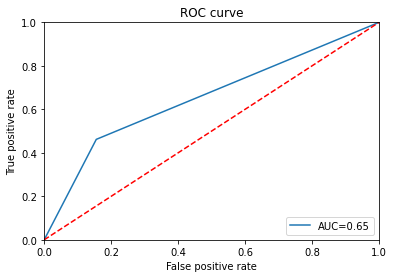

In [25]:
#plotting roc_auc
from sklearn import metrics
fpr,tpr,threshold=metrics.roc_curve(testy,p2_pred)
roc_auc=metrics.auc(fpr,tpr)
plt.title('ROC curve')
plt.plot(fpr,tpr,label="AUC=%0.2f"%roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.show()

In [26]:
#Updating Model report
tmp1=pd.Series({'Model':'M2','No. of features':len(trainx.columns),'cut off':cut_off,
                'tpr':np.round(tpr[1],2),'fpr':np.round(fpr[1],2),
                'Roc Auc':np.round(roc_auc,2)})

models_report=models_report.append(tmp1,ignore_index=True)
print(models_report)

  Model No. of features  cut off   tpr   fpr  Roc Auc
0    M1              20     0.50  0.86  0.52     0.67
1    M2              20     0.85  0.46  0.16     0.65


In [27]:
#feature selection by forward and backward propogation

def feature_selection(X, Y,initial_list=[],threshold_in=0.05,
                      threshold_out = 0.05,verbose=True):
    """ Perform a forward-backward feature selection
    based on p-value from statsmodels.api.OLS
    Arguments:
    X - pandas.DataFrame with candidate features
    y - list-like with the target
    initial_list - list of features to start with (column names of X)
    threshold_in - include a feature if its p-value < threshold_in
    threshold_out - exclude a feature if its p-value > threshold_out
    verbose - whether to print the sequence of inclusions and exclusions
    Returns: list of selected features
    Always set threshold_in < threshold_out to avoid infinite looping.
    See https://en.wikipedia.org/wiki/Stepwise_regression for the details
    """
    included = list(initial_list)
    while True:
        changed=False
        # forward step
        excluded = list(set(X.columns)-set(included))
        new_pval = pd.Series(index=excluded)
        for new_column in excluded:
            model = sts.Logit(Y, X[included+[new_column]]).fit()
            new_pval[new_column] = model.pvalues[new_column]
        best_pval = new_pval.min()
        if best_pval < threshold_in:
            best_feature = new_pval.index[new_pval.argmin()]
            included.append(best_feature)
            changed=True
            if verbose:
                print('Add {:30} with p-value {:.6}'.format(best_feature, best_pval))
        # backward step
        model = sts.Logit(Y, pd.DataFrame(X[included])).fit()
        # use all coefs except intercept
        pvalues = model.pvalues.iloc[1:]
        worst_pval = pvalues.max() # null if pvalues is empty
        if worst_pval > threshold_out:
            changed=True
            worst_feature = pvalues.argmax()
            included.remove(worst_feature)
            if verbose:
                print('Drop {:30} with p-value {:.6}'.format(worst_feature, worst_pval))
        if not changed:
            break
    return included
result = feature_selection(trainx, trainy)
print('resulting features:')
print(result)


<ipython-input-27-8cfa03f0b132>:23: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=excluded)


Optimization terminated successfully.
         Current function value: 0.604213
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.582661
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.608389
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.616336
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.620911
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.668565
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.618893
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.605804
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.558160
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.660816
  

Optimization terminated successfully.
         Current function value: 0.503260
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.503684
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.502793
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.504877
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.499718
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.504974
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.504817
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.503802
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.493332
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.504996
  

In [28]:
#building values after removing insignificant p value columns
trainx1=trainx[result]
testx1=testx[result]

m3=sts.Logit(trainy,trainx1).fit()
p3=m3.predict(testx1)

Optimization terminated successfully.
         Current function value: 0.483553
         Iterations 6


In [29]:
#classiication report and confusion matrix
p3_pred=p3.copy()
cut_off=0.5
p3_pred[p3_pred<cut_off]=0
p3_pred[p3_pred>=cut_off]=1
con_mat_3=confusion_matrix(testy,p3_pred)
class_rep_3=classification_report(testy,p3_pred)
print(class_rep_3)

              precision    recall  f1-score   support

           0       0.60      0.41      0.49        90
           1       0.78      0.88      0.83       210

    accuracy                           0.74       300
   macro avg       0.69      0.65      0.66       300
weighted avg       0.72      0.74      0.72       300



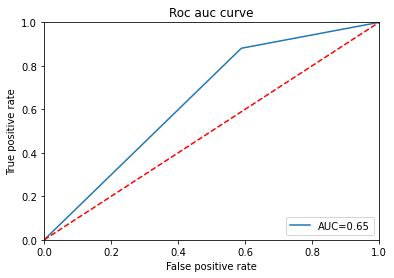

In [30]:
#plotting roc auc curve
fpr,tpr,threshold=metrics.roc_curve(testy,p3_pred)
roc_auc=metrics.auc(fpr,tpr)
plt.title('Roc auc curve')
plt.plot(fpr,tpr,label='AUC=%.2f'%roc_auc)
plt.plot([0,1],[0,1],'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.legend(loc='lower right')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.show()

In [31]:
#updating report
tmp1=pd.Series({'Model':'M3','No. of features':len(trainx1.columns),'cut off':cut_off,
                'tpr':np.round(tpr[1],2),'fpr':np.round(fpr[1],2),
                'Roc Auc':np.round(roc_auc,2)})

models_report=models_report.append(tmp1,ignore_index=True)
print(models_report)

  Model No. of features  cut off   tpr   fpr  Roc Auc
0    M1              20     0.50  0.86  0.52     0.67
1    M2              20     0.85  0.46  0.16     0.65
2    M3               7     0.50  0.88  0.59     0.65


In [32]:
#prediction with different cutoff
p4_pred=p3.copy()
cut_off=0.85
p4_pred[p4_pred<cut_off]=0
p4_pred[p4_pred>=cut_off]=1
con_mat_4=confusion_matrix(testy,p4_pred)
class_rep_4=classification_report(testy,p4_pred)
print(class_rep_4)

              precision    recall  f1-score   support

           0       0.40      0.82      0.54        90
           1       0.86      0.47      0.61       210

    accuracy                           0.58       300
   macro avg       0.63      0.65      0.57       300
weighted avg       0.72      0.58      0.59       300



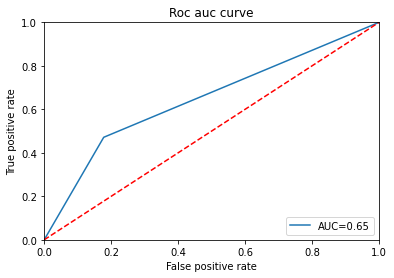

In [33]:
#plotting auc_roc curve
fpr,tpr,threshold=metrics.roc_curve(testy,p4_pred)
roc_auc=metrics.auc(fpr,tpr)
plt.title('Roc auc curve')
plt.plot(fpr,tpr,label='AUC=%.2f'%roc_auc)
plt.plot([0,1],[0,1],'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.legend(loc='lower right')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.show()

In [34]:
#final model report

tmp1=pd.Series({'Model':'M4','No. of features':len(trainx1.columns),'cut off':cut_off,
                'tpr':np.round(tpr[1],2),'fpr':np.round(fpr[1],2),
                'Roc Auc':np.round(roc_auc,2)})

models_report=models_report.append(tmp1,ignore_index=True)
print(models_report)

  Model No. of features  cut off   tpr   fpr  Roc Auc
0    M1              20     0.50  0.86  0.52     0.67
1    M2              20     0.85  0.46  0.16     0.65
2    M3               7     0.50  0.88  0.59     0.65
3    M4               7     0.85  0.47  0.18     0.65


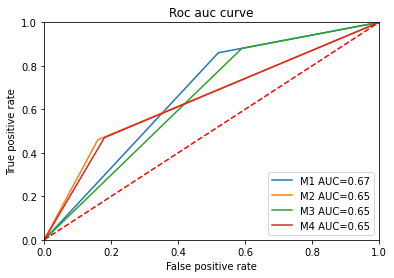

In [35]:
#plotting roc auc curve for all models

plt.title('Roc auc curve')
for i in range(len(models_report)):
    plt.plot([0,models_report.fpr[i],1],[0,models_report.tpr[i],1],
              label='%s AUC=%.2f'%(models_report['Model'][i],
                                   models_report['Roc Auc'][i]))
   
plt.plot([0,1],[0,1],'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.legend(loc='lower right')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.show()